# EDA

Perform exploratory data analysis and visualization for:

<br>

*American Community Survey - Selected Economic Characteristics (5 Year Estimates)*

**acs_5yr_est_selected_economic_characteristics_2010-2022.csv**

The American Community Survey (ACS) is an ongoing survey conducted by the US Census
Bureau that provides vital information on a yearly basis about various social and economic
characteristics across demographics.
~98K rows & 8 columns. Size: 12.1 MB. Source: American Community Survey

<br>

*Energy Sector Stocks and Commodities (HLOC)*

**all_commodities.csv**

**all_stocks_and_etfs.csv**

**stock_descriptions.csv**


A collection of daily high/low/open/close prices for stocks in the energy sector and four
exchange-traded funds (ETF) that track major indices (S&P 500, Nasdaq, Dow Jones Industrial
Average), some general information about these companies, and daily prices for energy
commodities.
Stocks and ETFs ~145K rows & 7 columns. Size: 7.1 MB
Commodities ~27K rows & 5 columns. Size: 1.9 MB
Descriptions 29 rows & 6 columns. Size: 14 KB
Source: Alpha Vantage and Yahoo! Finance

<br>

*Recent and Historic Energy Statistics*

**Energy Data - Consumption.csv**

**Energy Data - Emissions.csv**

**Energy Data - Imports & Exports.csv**

**Energy Data - Production.csv**

**Energy Data - Stocks.csv**


Import/exports volume, production, stocks, consumption, and emissions from energy sources in
the United States.
Imports & Exports ~19.5K rows & 10 columns. Size: 2.3 MB
Production ~10.3K rows & 7 columns. Size: 826 KB
Stocks ~17.5K rows & 11 columns. Size: 2.3 MB
Consumption ~57.6K rows & 12 columns. Size: 8.7 MB
Emissions ~48.3K rows & 10 columns. Size: 7.3 MB
Source: U.S. Energy Information Administration

<br>

*Monthly Transportation Statistics*

**monthly_transportation_statistics.csv**


The latest monthly and quarterly data from across the government and the transportation
industry.
289 rows & 137 columns. Size: 309 KB. Source: U.S. Dept of Transportation - Bureau of
Transportation Statistics













In [28]:
# import libraries for eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import sys

data_folderpath = r"data/!Spring_Invitational_2024_data/Datathon_Data"

## **acs_5yr_est_selected_economic_characteristics_2010-2022.csv**

In [29]:
# import data
econ_data_path = data_folderpath + r"/acs_5yr_est_selected_economic_characteristics_2010-2022.csv"

print(econ_data_path)

econ_data = pd.read_csv(econ_data_path)

#Print type of each col
print(econ_data.dtypes)

for col in econ_data.columns:
    print(col," - " ,type(econ_data[col][0]))

econ_data.head()

data/!Spring_Invitational_2024_data/Datathon_Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv
Label (Grouping)           object
Category                   object
State                      object
Estimate                   object
Margin of Error            object
Percent                    object
Percent Margin of Error    object
Year                        int64
dtype: object
Label (Grouping)  -  <class 'str'>
Category  -  <class 'str'>
State  -  <class 'str'>
Estimate  -  <class 'float'>
Margin of Error  -  <class 'float'>
Percent  -  <class 'float'>
Percent Margin of Error  -  <class 'float'>
Year  -  <class 'numpy.int64'>


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


## **all_commodities.csv**

In [56]:
# import data
commodities_data_path = data_folderpath + r"/all_commodities.csv"

print(commodities_data_path)

commodities_data = pd.read_csv(commodities_data_path).sort_values("Date_Time")

data/!Spring_Invitational_2024_data/Datathon_Data/all_commodities.csv


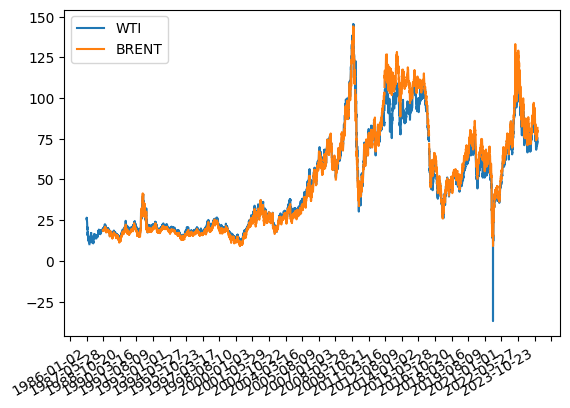

In [61]:
wti = commodities_data[commodities_data["Commodity_Simple"] == "WTI"]
brent = commodities_data[commodities_data["Commodity_Simple"] == "BRENT"]

plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.plot(wti["Date_Time"], wti["Value"], label="WTI")
plt.plot(brent["Date_Time"], brent["Value"], label="BRENT")
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

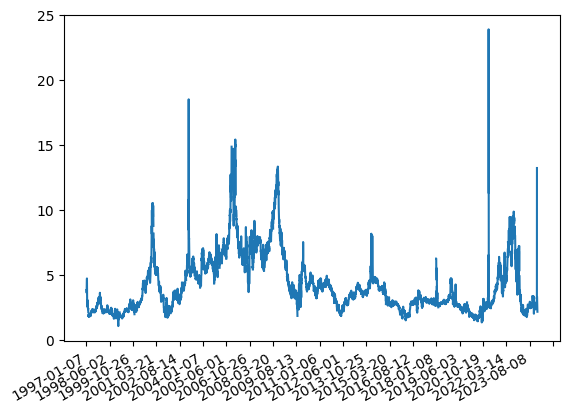

In [60]:
natural_gas = commodities_data[commodities_data["Commodity_Simple"] == "NATURAL_GAS"]

plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.plot(natural_gas["Date_Time"], natural_gas["Value"])
plt.gcf().autofmt_xdate()
plt.show()

## **all_stocks_and_etfs.csv**

In [71]:
# import data
stocks_path = data_folderpath + r"/all_stocks_and_etfs.csv"

print(stocks_path)

stocks = pd.read_csv(stocks_path).sort_values("Date-Time")

data/!Spring_Invitational_2024_data/Datathon_Data/all_stocks_and_etfs.csv


In [72]:
stocks.head()

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
144557,1999-11-01,136.500,137.000,135.5625,135.5625,4006500,SPY
34973,1999-11-01,8.813,8.875,8.7500,8.7500,20700,BPT
106080,1999-11-01,20.750,21.060,20.5600,21.0000,209000,EOG
117765,1999-11-01,61.250,62.560,59.7500,62.5000,2854800,SLB
6096,1999-11-01,38.250,38.810,36.7500,38.7500,3166300,HAL


In [68]:
stocks["Ticker_Symbol"].unique()

array(['HAL', 'FANG', 'E', 'EXC', 'HES', 'BKR', 'BPT', 'VLO', 'CVX',
       'OXY', 'KMI', 'PSX', 'NOV', 'CHK', 'MPC', 'DVN', 'COP', 'EPD',
       'BP', 'XOM', 'EOG', 'CEO', 'SLB', 'WMB', 'ONEQ', 'DIA', 'VOO',
       'SPY'], dtype=object)

## **Energy Data - Consumption.csv**

In [74]:
# import data
energy_consumption_path = data_folderpath + r"/Energy Data - Consumption.csv"

print(energy_consumption_path)

energy_consumption = pd.read_csv(energy_consumption_path)

data/!Spring_Invitational_2024_data/Datathon_Data/Energy Data - Consumption.csv


In [75]:
energy_consumption.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,DFRCPUS,197301,1/1/1973,1706.943,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
1,DFRCPUS,197302,2/1/1973,1614.436,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
2,DFRCPUS,197303,3/1/1973,1140.521,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
3,DFRCPUS,197304,4/1/1973,824.604,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
4,DFRCPUS,197305,5/1/1973,676.745,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential


In [ ]:
energy_consumption["Description"].unique()

## **Energy Data - Emissions.csv**

In [123]:
# import data
energy_emissions_path = data_folderpath + r"/Energy Data - Emissions.csv"

print(energy_emissions_path)

energy_emissions = pd.read_csv(energy_emissions_path)
energy_emissions = energy_emissions[energy_emissions["Value"] != "Not Available"]

data/!Spring_Invitational_2024_data/Datathon_Data/Energy Data - Emissions.csv


In [77]:
energy_emissions.head()

,MSN,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
1,CKTCEUS,197302,2/1/1973,98.833,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
2,CKTCEUS,197303,3/1/1973,98.483,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
3,CKTCEUS,197304,4/1/1973,94.15,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
4,CKTCEUS,197305,5/1/1973,95.424,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN


In [96]:
energy_emissions["Energy Type"].unique(), energy_emissions["Energy Class"].unique()

(array(['Coal', 'Natural Gas', 'Aviation Gasoline', 'Distillate Fuel Oil',
        'Hydrocarbon Gas Liquids (HGL)', 'Jet Fuel', 'Kerosene',
        'Lubricants', 'Motor Gasoline', 'Petroleum Coke',
        'Residual Fuel Oil', 'Other', 'Total', 'Electricity', 'Coal Coke',
        'Geothermal Energy', 'Non-Biomass Waste', 'Wood', 'Biomass Waste',
        'Fuel Ethanol', 'Biodiesel', 'Biomass'], dtype=object),
 array(['Coal', 'Natural Gas', 'Petroleum', 'Total', 'Electricity',
        'Geothermal Energy', 'Non-Biomass Waste', 'Biomass'], dtype=object))

In [124]:
energy_emissions["Value"] = energy_emissions["Value"].apply(lambda s: int(s.replace(".", "")))

agg_emissions = (
    energy_emissions[energy_emissions["Value"] != "Not Available"]
    .groupby(["YYYYMM", "Energy Class", "Unit", "Sector"])
    .agg("sum").reset_index()
    [["YYYYMM", "Energy Class", "Unit", "Sector", "Value"]]
)

In [126]:
agg_emissions[agg_emissions["Energy Class"] == "Total"]["Sector"].unique()

array(['Commercial', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

## **Energy Data - Imports & Exports.csv**

In [82]:
# import data
imports_exports_path = data_folderpath + r"/Energy Data - Imports & Exports.csv"

print(imports_exports_path)

imports_export = pd.read_csv(imports_exports_path)

data/!Spring_Invitational_2024_data/Datathon_Data/Energy Data - Imports & Exports.csv


In [84]:
imports_export.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Country,Unit,OPEC,Import Export
0,PAIMPAG,197301,1/1/1973,180.065,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
1,PAIMPAG,197302,2/1/1973,173.679,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
2,PAIMPAG,197303,3/1/1973,141.323,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
3,PAIMPAG,197304,4/1/1973,108.867,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
4,PAIMPAG,197305,5/1/1973,180.581,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import


## **Energy Data - Production.csv**

In [85]:
# import data
energy_production_path = data_folderpath + r"/Energy Data - Production.csv"

print(energy_production_path)

energy_production = pd.read_csv(energy_production_path)

data/!Spring_Invitational_2024_data/Datathon_Data/Energy Data - Production.csv


In [86]:
energy_production.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit
0,WDPRBUS,197301,1/1/1973,129.63,1,Wood Energy Production,Trillion Btu
1,WDPRBUS,197302,2/1/1973,117.194,1,Wood Energy Production,Trillion Btu
2,WDPRBUS,197303,3/1/1973,129.763,1,Wood Energy Production,Trillion Btu
3,WDPRBUS,197304,4/1/1973,125.462,1,Wood Energy Production,Trillion Btu
4,WDPRBUS,197305,5/1/1973,129.624,1,Wood Energy Production,Trillion Btu


## **monthly_transportation_statistics.csv**

In [80]:
# import data
monthly_transportation_path = data_folderpath + r"/monthly_transportation_statistics.csv"

print(monthly_transportation_path)

monthly_transportation = pd.read_csv(monthly_transportation_path)

data/!Spring_Invitational_2024_data/Datathon_Data/monthly_transportation_statistics.csv


In [81]:
monthly_transportation.head()

,Date,Month,Year,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/2000 12:00:00 AM,1,2000,119.0,NaN,NaN,NaN,NaN,NaN,NaN,...,521000.0,NaN,8808000.0,NaN,9307000.0,NaN,NaN,NaN,NaN,NaN
1,02/01/2000 12:00:00 AM,2,2000,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,522000.0,NaN,9313000.0,NaN,9566000.0,NaN,NaN,NaN,NaN,NaN
2,03/01/2000 12:00:00 AM,3,2000,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,521000.0,NaN,8851000.0,NaN,8970000.0,NaN,NaN,NaN,NaN,NaN
3,04/01/2000 12:00:00 AM,4,2000,62.0,NaN,NaN,NaN,NaN,NaN,NaN,...,497000.0,NaN,8539000.0,NaN,8903000.0,NaN,NaN,NaN,NaN,NaN
4,05/01/2000 12:00:00 AM,5,2000,86.0,NaN,NaN,NaN,NaN,NaN,NaN,...,476000.0,NaN,8590000.0,NaN,8877000.0,NaN,NaN,NaN,NaN,NaN


## **Energy Data - Stocks.csv**

In [87]:
# import data
energy_stocks_path = data_folderpath + r"/Energy Data - Stocks.csv"

print(energy_stocks_path)

energy_stocks = pd.read_csv(energy_stocks_path)

data/!Spring_Invitational_2024_data/Datathon_Data/Energy Data - Stocks.csv


In [88]:
energy_stocks.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,COSQPUS,197301,1/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
1,COSQPUS,197302,2/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
2,COSQPUS,197303,3/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
3,COSQPUS,197304,4/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
4,COSQPUS,197305,5/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN


## **stock_descriptions.csv**

In [78]:
# import data
stock_descriptions_path = data_folderpath + r"/stock_descriptions.csv"

print(stock_descriptions_path)

stock_descriptions = pd.read_csv(stock_descriptions_path)

data/!Spring_Invitational_2024_data/Datathon_Data/stock_descriptions.csv


In [79]:
stock_descriptions.head()

,Symbol,AssetType,Name,Description,Sector,Industry
0,BKR,Common Stock,Baker Hughes Company,Baker Hughes Company provides a portfolio of t...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES
1,BP,Common Stock,BP PLC ADR,BP plc participates in the energy business glo...,ENERGY & TRANSPORTATION,PETROLEUM REFINING
2,BPT,Common Stock,BP Prudhoe Bay Royalty Trust,BP Prudhoe Bay Royalty Trust is a grantor trus...,TECHNOLOGY,GENERAL
3,CEO,Common Stock,CNOOC Limited,CNOOC Limited operates exploration and product...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES
4,CHK,Common Stock,Chesapeake Energy Corporation,"Chesapeake Energy Corporation, an independent ...",ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES
